## Import Library

In [ ]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import plotly.express as px
from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output


## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Probabilitas Statistika

/content/drive/MyDrive/Probabilitas Statistika


In [ ]:
#Dataset: https://www.kaggle.com/muhammetvarl/laptop-price
df = pd.read_csv('./laptop_price.csv',encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.300,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.690
1,2,Apple,Macbook Air,Ultrabook,13.300,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.940
2,3,HP,250 G6,Notebook,15.600,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.000
3,4,Apple,MacBook Pro,Ultrabook,15.400,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.450
4,5,Apple,MacBook Pro,Ultrabook,13.300,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df['Inches']

0      13.300
1      13.300
2      15.600
3      15.400
4      13.300
        ...  
1298   14.000
1299   13.300
1300   14.000
1301   15.600
1302   15.600
Name: Inches, Length: 1303, dtype: float64

# Data Visualization and Feature("independent variable") Engineering

In [ ]:
df['Inches'] = df['Inches'].apply(str)
df['Weight'] = df['Weight'].apply(lambda x: str(x).split('k')[0])

In [ ]:
df['Weight'] = df['Weight'].apply(float)

Text(0.5, 1.0, 'Average Laptop Price Per Company')

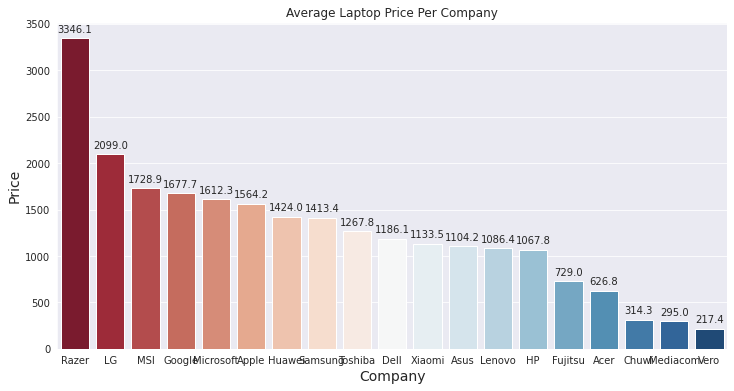

In [ ]:
temp = df.groupby(['Company']).mean().reset_index().sort_values(by='Price_euros',ascending=False)
plt.figure(figsize = (12,6))
splot = sns.barplot(data = temp,x = 'Company', y = 'Price_euros',palette = 'RdBu')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Company", size=14)
plt.ylabel("Price", size=14)
plt.title('Average Laptop Price Per Company')

In [ ]:
temp = df.groupby(['Company','Ram']).mean().reset_index().sort_values(by='Price_euros',ascending=False)
px.scatter(data_frame = temp, x = 'Company', y = 'Price_euros',color = 'Ram',title = 'Average Laptop Price for Each Company/RAM amount')

**Checking some outliers**

In [ ]:
px.scatter(data_frame = df,x = 'Inches',y = 'Price_euros')

In [ ]:
px.scatter(data_frame = df,x = 'Ram',y = 'Price_euros')

In [ ]:
#Removing Outliers after checking them using scatter plot
df = df[~((df['Price_euros'] > 3500) &(df['Ram']== '8GB'))]
df = df[~((df['Price_euros'] > 3500) &(df['Ram']== '16GB'))]

In [ ]:
df = df[~((df['Price_euros'] == 4899) &(df['Inches']== 15.6))]
df = df[~((df['Price_euros'] >= 5000) &(df['Inches']== 17.3))]

> We can easily compare laptops prices with respect to ram with this amazing graph above

In [ ]:
temp = df.groupby(['Company','Memory']).mean().reset_index().sort_values(by='Price_euros',ascending=False)
px.scatter(data_frame = temp, x = 'Memory', y = 'Price_euros',color = 'Company',title = 'Average Laptop Price for Each Company/Memory')

In [ ]:
temp = df.groupby(['Company','Inches']).mean().reset_index().sort_values(by='Price_euros',ascending=False)
px.scatter(data_frame = temp, x = 'Inches', y = 'Price_euros',color = 'Company', title = 'Average Laptop Price for Each Company/Size in Inches')

# Checking skweness and transforming the target column


 mu = 1119.01 and sigma = 688.94



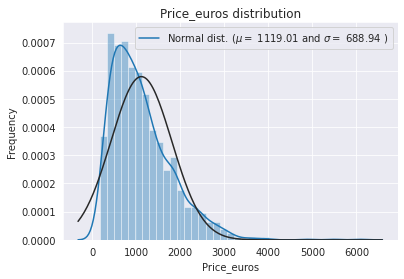

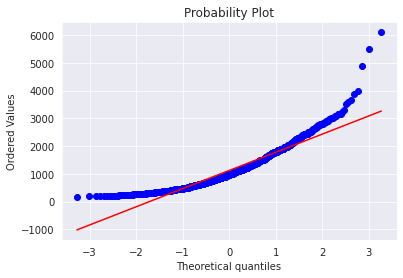

In [ ]:
sns.distplot(df['Price_euros'] , fit=norm)
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Price_euros'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price_euros distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Price_euros'], plot=plt)
plt.show()

**Log Transformation**


 mu = 6.84 and sigma = 0.62



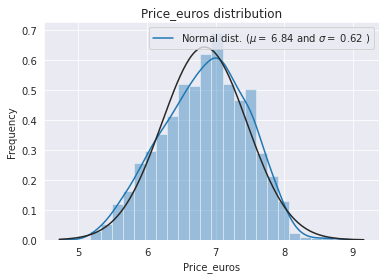

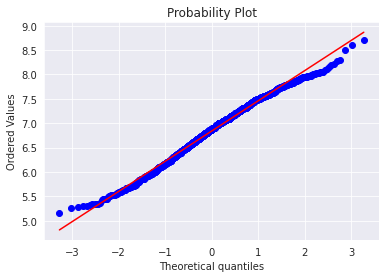

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["Price_euros"] = np.log1p(df["Price_euros"])

#Check the new distribution 
sns.distplot(df['Price_euros'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Price_euros'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price_euros distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Price_euros'], plot=plt)
plt.show()

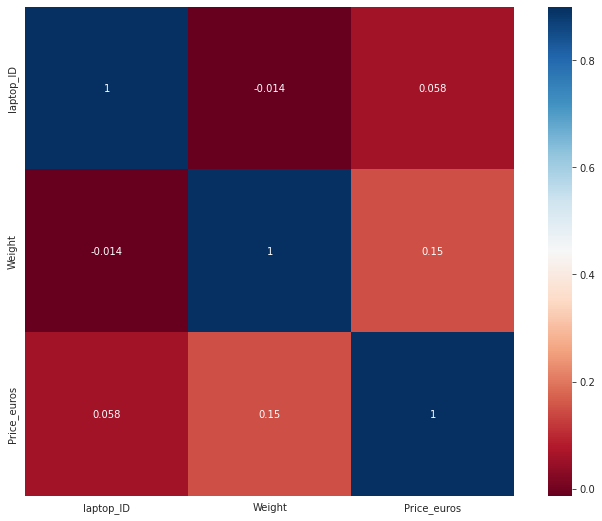

In [ ]:
#Correlation map to see how features are correlated with Price_euros
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap = 'RdBu',annot = True)

**There is no Correlation between the price and other variables and there is no intercorrelation**

In [ ]:
#Dont need ID column for the model
df.drop(columns = 'laptop_ID',inplace = True)

In [ ]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys']
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))


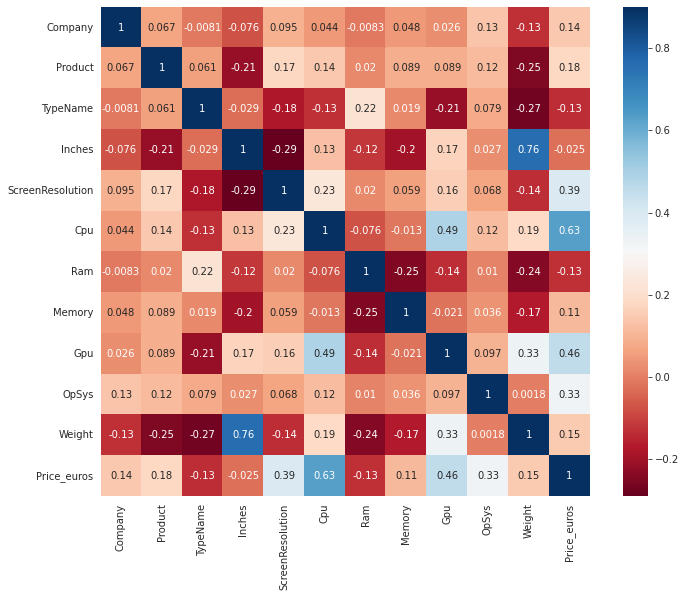

In [ ]:
#Correlation map to see how features are correlated with Price_euros
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap = 'RdBu',annot = True)

In [ ]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,7,23,65,8,4,58,8,1.370,7.201
1,1,301,4,7,1,63,8,2,51,8,1.340,6.802
2,7,50,3,14,8,74,8,16,53,4,1.860,6.356
3,1,300,4,13,25,85,1,29,9,8,1.830,7.839
4,1,300,4,7,23,67,8,16,59,8,1.370,7.498


# Model Building

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
X = df.iloc[:,:-1]
y = df['Price_euros']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

**Lasso Regression**

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.4139 (0.0149)



**Elastic Net Regression**

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.4139 (0.0149)



**Kernel Ridge Regression**

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3032 (0.0178)



**Gradient Boosting Regression**

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1700 (0.0059)



**XGBoost Regression**

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1759 (0.0043)



**LGBM**

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1862 (0.0084)



In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.4139 (0.0149)



In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3032 (0.0178)



# Fitting the best model and getting the predictions array

In [ ]:
GBoost.fit(X_train,y_train)
gboost_pred = GBoost.predict(X_test)


In [ ]:
result = pd.DataFrame({'Y_TEST':y_test.values,'Y_PRED' : pd.Series(gboost_pred).values})

In [ ]:
px.line(data_frame = result)

# Almost perfect fit on the test data!

In [ ]:
# MAE 
from sklearn.metrics import mean_absolute_error

print('MAE:', mean_absolute_error(y_test, gboost_pred))

MAE: 0.11970947575019962


In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(y_test, gboost_pred))

MSE: 0.029589429836364495


In [ ]:
# T Test
from scipy import stats
stats.ttest_rel(y_test, gboost_pred)
print('t-statistic = %6.3f pvalue = %6.4f' % stats.ttest_rel(y_test, gboost_pred))

# RMSE
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test, gboost_pred)))

# R2
from sklearn.metrics import r2_score
print('R2:', r2_score(y_test, gboost_pred))

t-statistic = -1.721 pvalue = 0.0868
RMSE: 0.1720157836838367
R2: 0.9162330021962233
